# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [33]:
import numpy as np
import pandas as pd
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [34]:
data = pd.read_csv('./titanic.csv',
                  index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

In [35]:
print(len(data))

891


**Данные представлены в виде таблицы. Вывести первые 5 строк:**

In [36]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Вывести описательную статистику**

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [38]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Определите, сколько пассажиров выжило, а сколько - нет?**

In [39]:
survivors = data[data['Survived'] == 1]
print(f'всего {len(data)} человек')
print(f'выжило {len(survivors)} человек')
print(f'не выжило {len(data) - len(survivors)} человек')

всего 891 человек
выжило 342 человек
не выжило 549 человек


**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [40]:
sur_clss = data.groupby(['Pclass']).agg({'Survived':['size','sum','mean']})
sur_clss

Survived               
           size  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [41]:
sur_sxs = data.groupby(['Sex']).agg({'Survived':['size','sum','mean']})
sur_sxs

Survived               
           size  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [42]:
sxs_in_clss = data.groupby(['Pclass', 'Sex']).size()
sxs_in_clss

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [43]:
c_pass = data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]
c_pass.sort_values(by='Fare', ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


**Создать категориальный признак для заданных градаций возраста пассажира.**

In [44]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    data["age_category"] = (data[age] >= 30).astype(int) + (data[age] > 55).astype(int) + 1

In [45]:
age_category("Age")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


**Определить, сколько мужчин / женщин находилось на борту?**

In [46]:
data.groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

Количество мужчин 2-го класса: 108


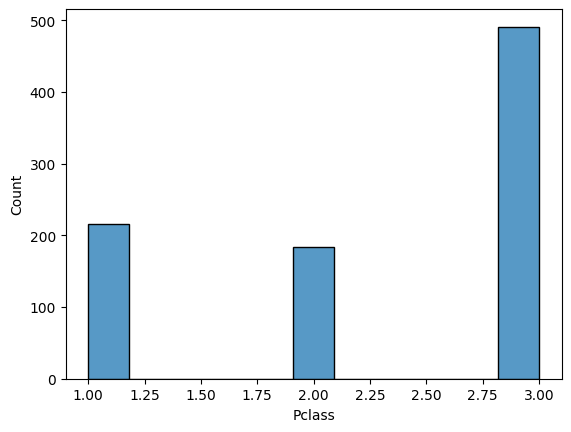

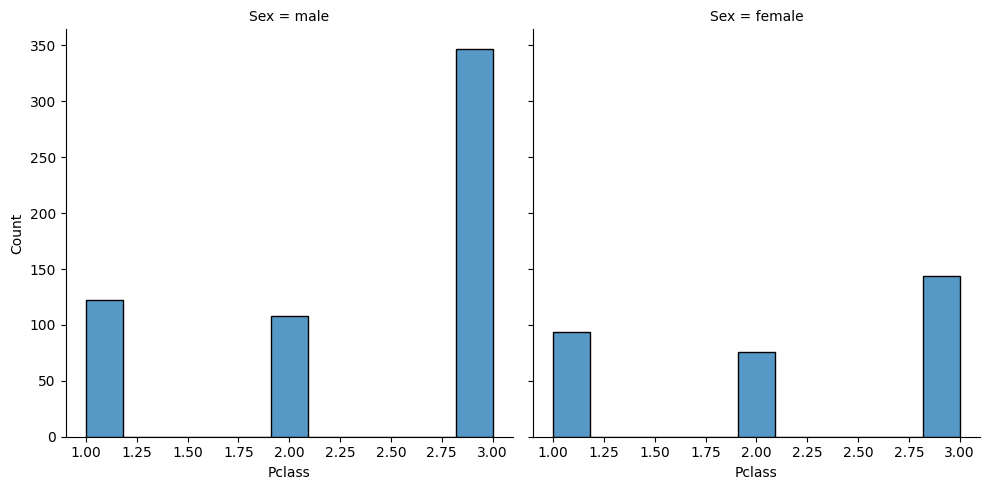

In [47]:
import seaborn as sns

sns.histplot(data["Pclass"])
sns.displot(data=data, x="Pclass", col="Sex")
print(f'Количество мужчин 2-го класса: {len(data[(data["Pclass"] == 2) & (data["Sex"] == "male")])}')

**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [48]:
survivor_class_data = data.groupby("Pclass").agg({"Survived":"sum"})
frst_cl = data[data['Pclass' ] == 1]
trd_cl = data[data['Pclass' ] == 3]

class_3 = round(survivor_class_data["Survived"][3] / len(trd_cl), 3)
class_1 = round(survivor_class_data["Survived"][1] / len(frst_cl), 3)
print(f'Доля выживших пассажиров класса 3: {class_3}, доля выживших пассажиров класса 1: {class_1}')

Доля выживших пассажиров класса 3: 0.242, доля выживших пассажиров класса 1: 0.63


**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [49]:
fare_median = round(data["Fare"].quantile(0.5), 2)
fare_std = round(data["Fare"].std(), 2)
print(f'Медиана платежей: {fare_median}, стандартное отклонение платежей: {fare_std}')

Медиана платежей: 14.45, стандартное отклонение платежей: 49.69


**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [50]:
young_survivors = data[data["Age"] < 30].agg({"Survived": "mean"})["Survived"]
old_survivors = data[data["Age"] > 60].agg({"Survived": "mean"})["Survived"]

print(f'Доля выживших среди молодых пассажиров больше: {young_survivors > old_survivors}')
print(f'Доля выживших среди молодых пассажиров: {round(young_survivors, 2)}, среди немолодых: {round(old_survivors, 2)}')

Доля выживших среди молодых пассажиров больше: True
Доля выживших среди молодых пассажиров: 0.41, среди немолодых: 0.23


**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [51]:
female_survivors = data[data["Sex"] == "female"].agg({"Survived": "mean"})["Survived"]
male_survivors = data[data["Sex"] == "male"].agg({"Survived": "mean"})["Survived"]

print(f'Доля выживших среди пассажиров женского пола больше: {female_survivors > male_survivors}')
print(f'Доля выживших среди пассажиров женского пола: {round(female_survivors, 2)}, среди мужского: {round(male_survivors, 2)}')

Доля выживших среди пассажиров женского пола больше: True
Доля выживших среди пассажиров женского пола: 0.74, среди мужского: 0.19


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

In [52]:
names_list = []

# формирование списка имен
for i in data["Name"]:
    first_name = [i.split()[2]]
    names_list += first_name

# увеличиваем id на 1, чтобы соответствовать исходной таблице
names_df = pd.DataFrame({"id":[i + 1 for i in range(len(names_list))],"first_name": names_list})
names_df = names_df.set_index("id")
data["first_name"] = names_df

# список мужских имен без повторений
unique_male_names = data[data["Sex"] == "male"]["first_name"].unique()

# количество раз, когда данное имя встречается в таблице
names_freq = []
for i in unique_male_names:
    names_freq += [(data["first_name"] == i).astype(int).sum()]

# поиск нужного имени
male_name_frequencies = pd.DataFrame({"name":unique_male_names, "count":names_freq})
male_name_frequencies = male_name_frequencies.set_index("name")
max_count = male_name_frequencies.max().iloc[0]
print(male_name_frequencies[male_name_frequencies["count"] == max_count])

         count
name          
William     48


**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [53]:
print(data[data["Sex"] == "male"].groupby("Pclass").agg({"Age":"mean"}))
print(data[data["Sex"] == "female"].groupby("Pclass").agg({"Age":"mean"}))

              Age
Pclass           
1       41.281386
2       30.740707
3       26.507589
              Age
Pclass           
1       34.611765
2       28.722973
3       21.750000


**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

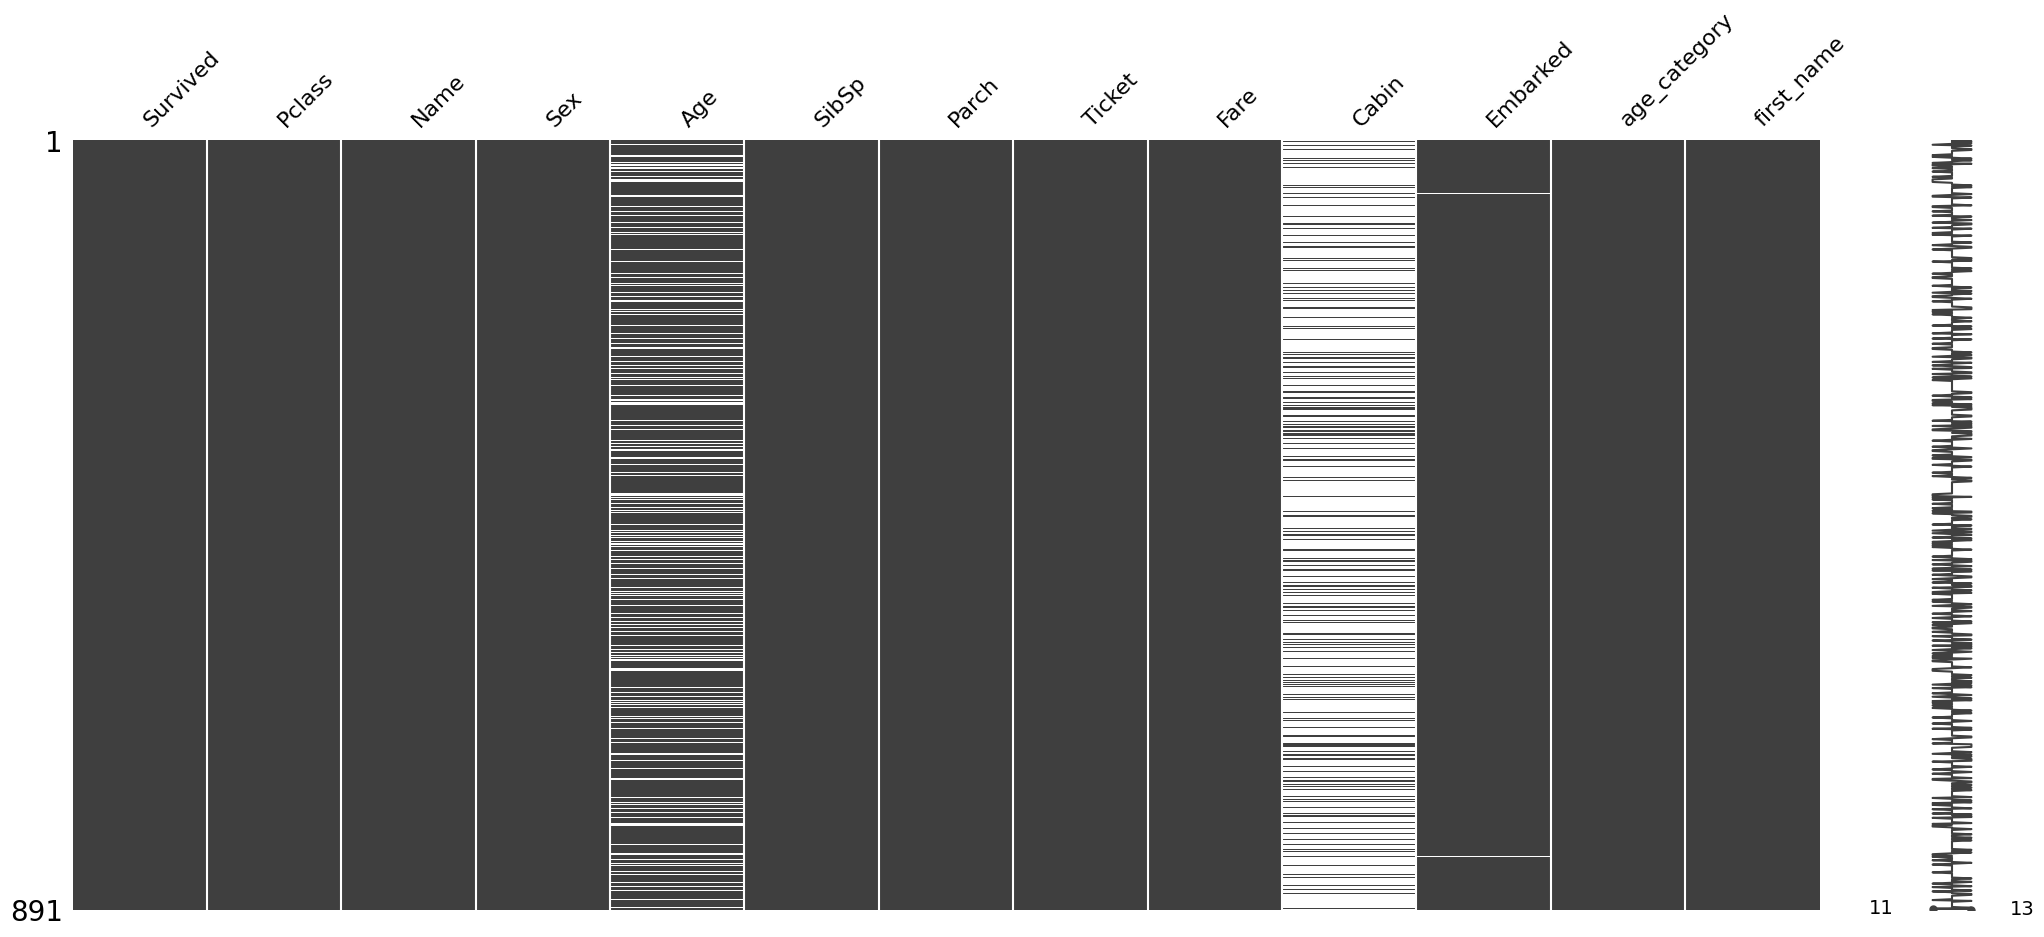

In [54]:
import missingno 
missingno.matrix(data)

**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

<Axes: >

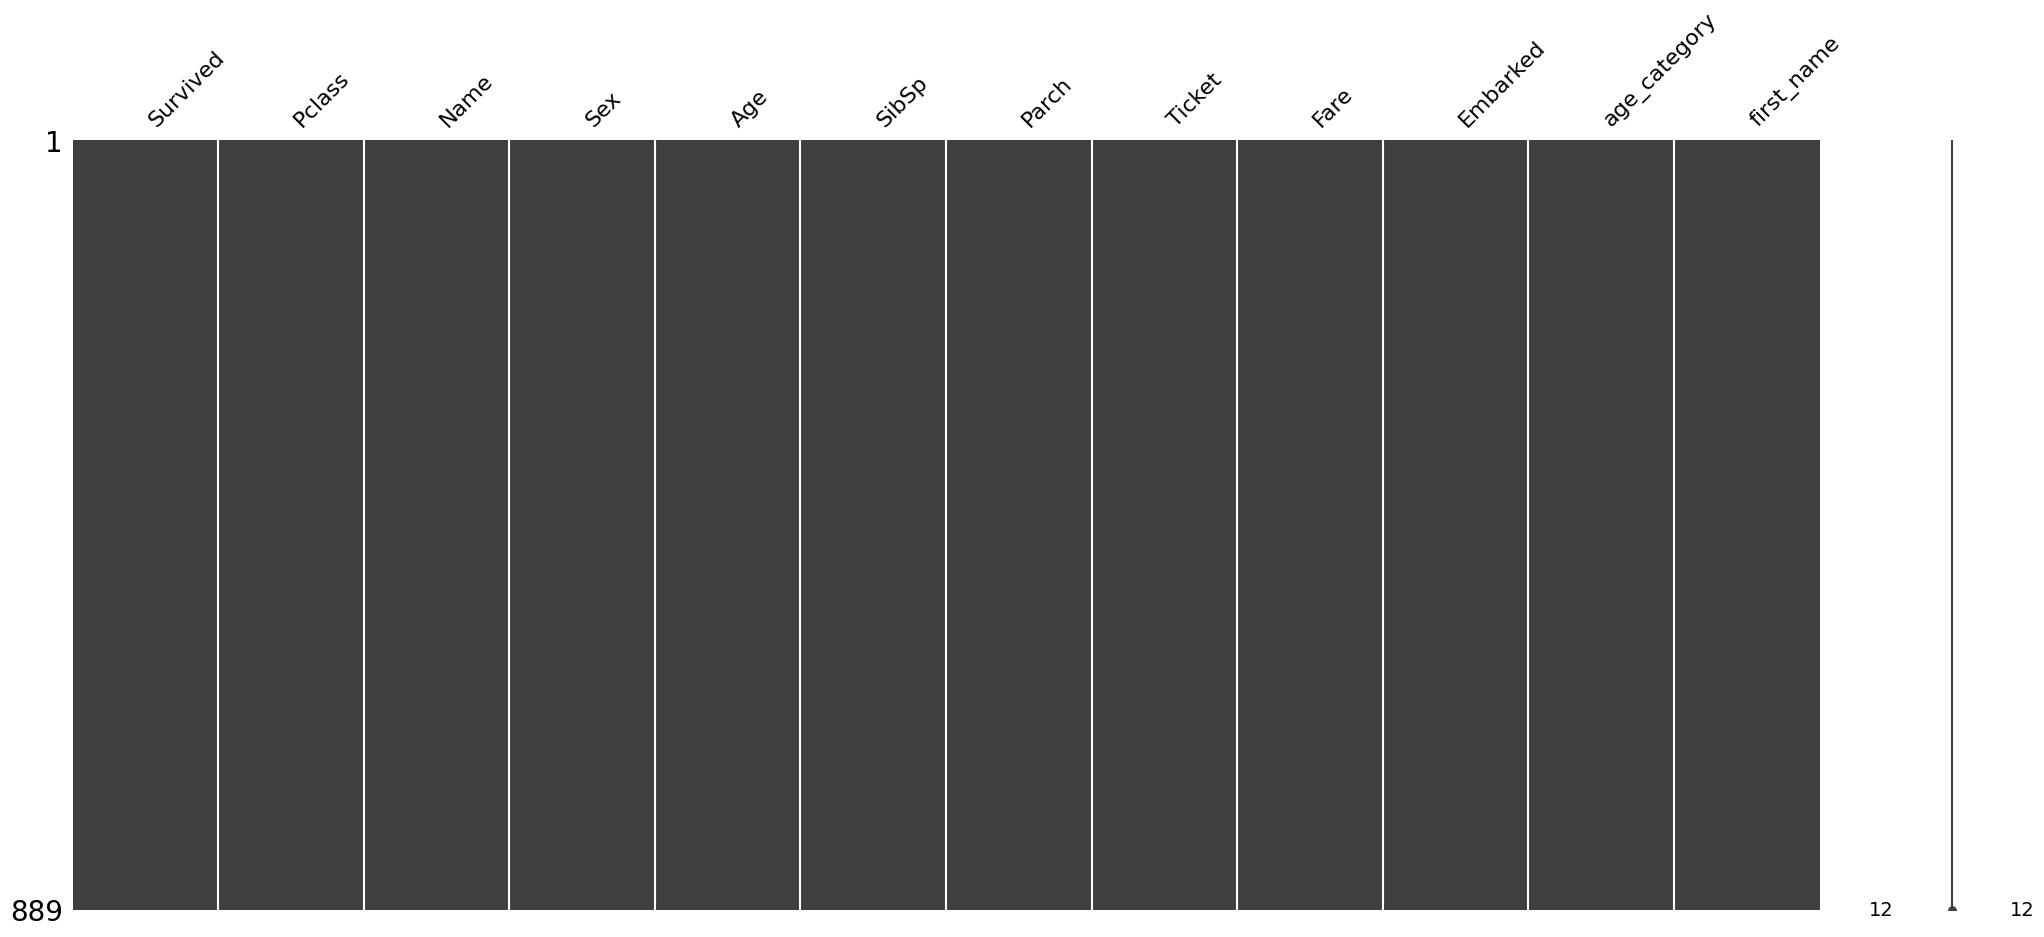

In [55]:
new_data = data.copy(deep=True)

new_data = new_data.drop(["Cabin"], axis=1)

median = new_data["Age"].quantile(0.5)

new_data["Age"].fillna(value=median, inplace=True)

new_data.dropna(how="any", inplace=True)

missingno.matrix(new_data)

**Для категориальных переменных построить столбчатую диаграмму**

<Axes: xlabel='Embarked', ylabel='Count'>

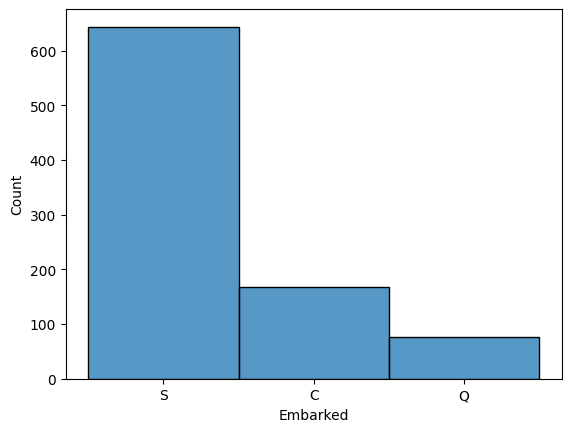

In [56]:
sns.histplot(data["Embarked"])

**Постройте попарные зависимости (диаграммы рассеяния) для признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='age_category', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='SibSp', ylabel='Pclass'>,
        <Axes: xlabel='Parch', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='age_category', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='SibSp', ylabel='Age'>,
        <Axes: xlabel='Parch', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
     

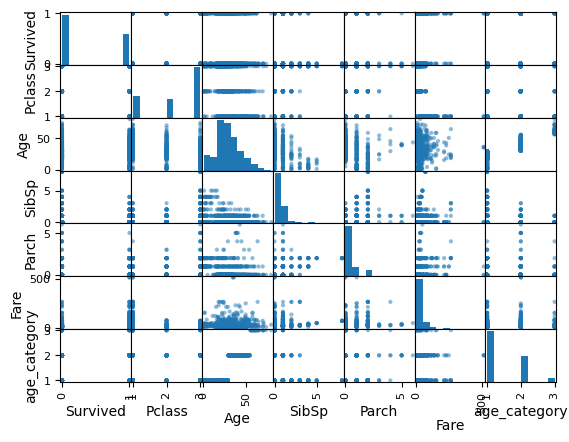

In [57]:
copy_data = data.copy(deep=True)

copy_data.drop(["Sex"], axis=1, inplace=True)

pd.plotting.scatter_matrix(copy_data)

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare'>

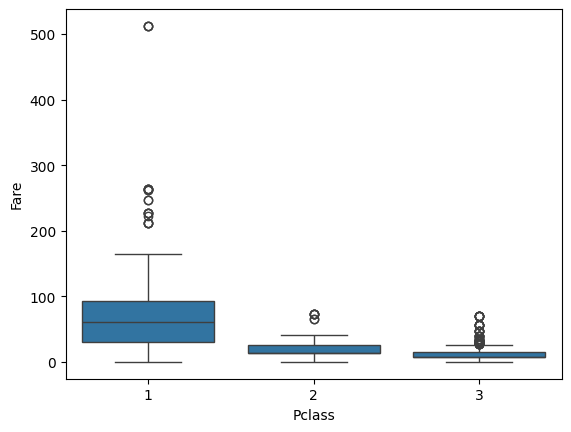

In [58]:
sns.boxplot(x="Pclass", y="Fare", data=data)

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

<Axes: xlabel='Pclass', ylabel='Fare_no_out'>

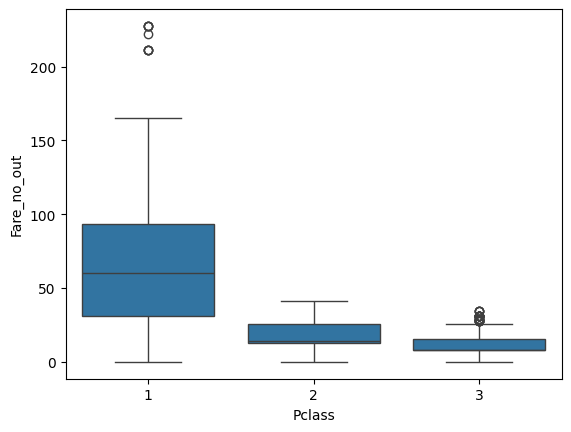

In [59]:
train_df = data.copy(deep=True)

train_df['Fare_no_out'] = train_df['Fare']

fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']

max_pclass1 = fare_pclass1.mean() + fare_pclass1.std()
max_pclass2 = fare_pclass2.mean() + fare_pclass2.std()
max_pclass3 = fare_pclass3.mean() + fare_pclass3.std()

fare_pclass1_no_out = fare_pclass1.where((fare_pclass1 - fare_pclass1.mean()) < 2 * fare_pclass1.std(), max_pclass1)
fare_pclass2_no_out = fare_pclass2.where((fare_pclass2 - fare_pclass2.mean()) < 2 * fare_pclass2.std(), max_pclass2)
fare_pclass3_no_out = fare_pclass3.where((fare_pclass3 - fare_pclass3.mean()) < 2 * fare_pclass3.std(), max_pclass3)

train_df.loc[train_df['Pclass'] == 1, 'Fare_no_out'] = fare_pclass1_no_out
train_df.loc[train_df['Pclass'] == 2, 'Fare_no_out'] = fare_pclass2_no_out
train_df.loc[train_df['Pclass'] == 3, 'Fare_no_out'] = fare_pclass3_no_out

# выбросы все равно имеются, но их уже значительно меньше, о чем говорит "ящик с усами"
sns.boxplot(x="Pclass", y="Fare_no_out", data=train_df)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

<Axes: xlabel='Sex', ylabel='percent'>

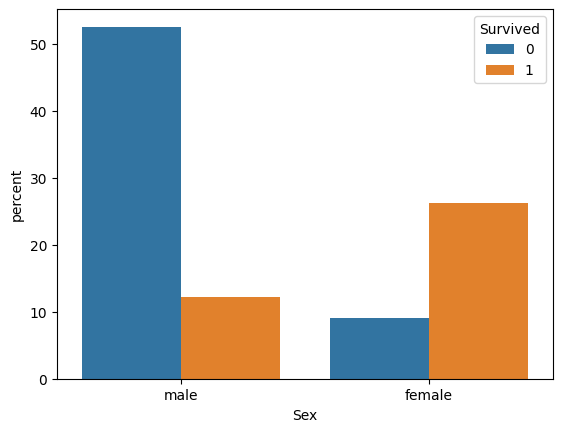

In [60]:
sns.countplot(data, x="Sex", hue="Survived", stat="percent")

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

<Axes: xlabel='Pclass', ylabel='percent'>

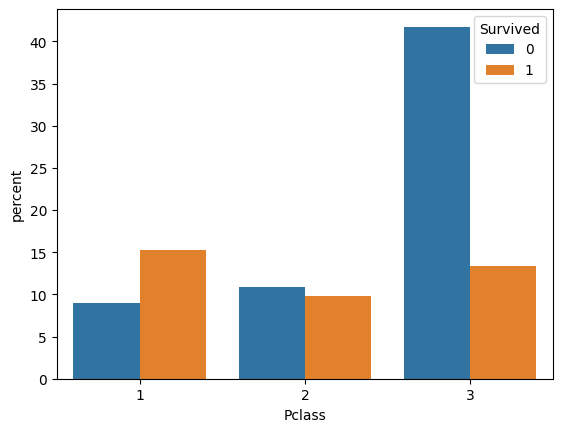

In [61]:
sns.countplot(data, x="Pclass", hue="Survived", stat="percent")

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

<Axes: xlabel='age_category', ylabel='percent'>

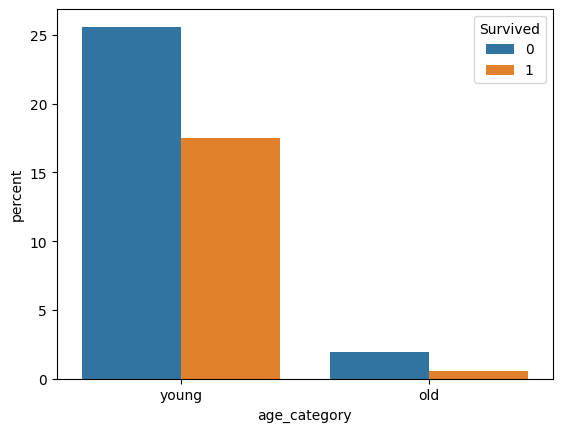

In [62]:
def age_classify(row):
    if row.Age < 30:
        return "young"
    elif row.Age > 60:
        return "old"

copy_data = data.copy(deep=True)
copy_data.drop(["age_category"], axis=1, inplace=True)

copy_data["age_category"] = (copy_data["Age"] > 60).astype(int) + (copy_data["Age"] < 30).astype(int)

age_data = copy_data.apply(age_classify, axis="columns")

copy_data["age_category"] = age_data
sns.countplot(copy_data, x="age_category", hue="Survived", stat="percent")

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

In [67]:
copy_data = data.copy(deep=True)
copy_data.drop("age_category", axis=1, inplace=True)

corr = copy_data.corr(numeric_only=True)

m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()

raw = corr.loc[m, m]
raw.style.background_gradient(cmap='coolwarm')

,Pclass,Fare
Pclass,1.000000,-0.549500
Fare,-0.549500,1.000000
